In [8]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from script.multi_points_modeling import multi_points_modeling, multi_points_modeling_multi_scaled
TI = np.loadtxt('ti_strebelle.dat', skiprows = 3).reshape(250,250,1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 1.0, '7771')

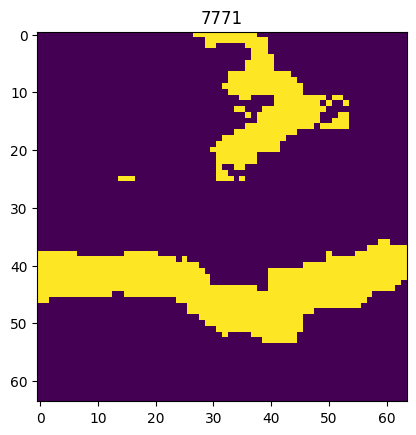

In [ ]:
##########################################
##  original demo for 128x128x1         ##
##########################################
random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 64, 64, 1
template_size = [5, 5, 1]
level_size = 2
n_level = 4 

real = multi_points_modeling_multi_scaled(TI, n_level, level_size, 
                                          template_size, random_seed, 
                                          real_nx, real_ny, real_nz)
plt.imshow(real)
plt.title(f'{random_seed}')

Running one iteration of the MPS simulation...
One iteration of the MPS simulation completed in 0.92 seconds.


Text(0.5, 1.0, '7771')

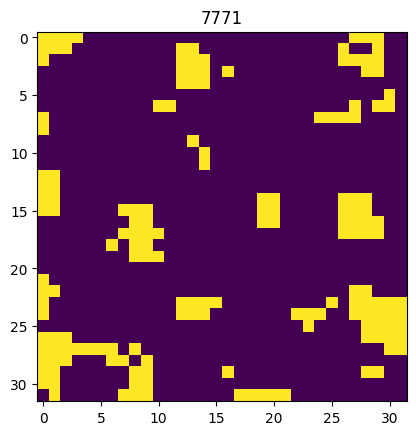

In [26]:
##########################################
##  original demo for 128x128x1         ##
##########################################
random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 32, 32, 1
template_size = [5, 5, 1]

real = multi_points_modeling(TI, template_size, random_seed, real_nx, real_ny, real_nz, verbose=True)
plt.imshow(real)
plt.title(f'{random_seed}')

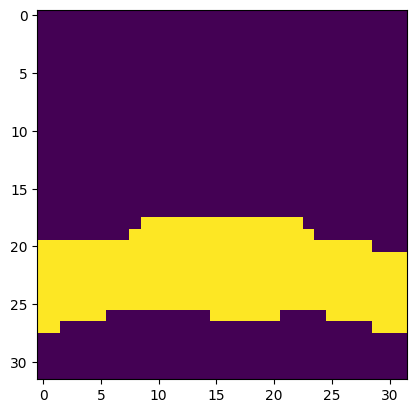

In [29]:
plt.imshow(TI[:32, :32])

In [80]:
soft_data = np.ones((32, 32, 1, 2))*-1
tau = 0.9
soft_data[...,0] = ((1-TI[:32,:32])*tau) + (1-tau)
soft_data[...,1] = (TI[:32,:32]*tau) + (1-tau)

Text(0.5, 1.0, '7771')

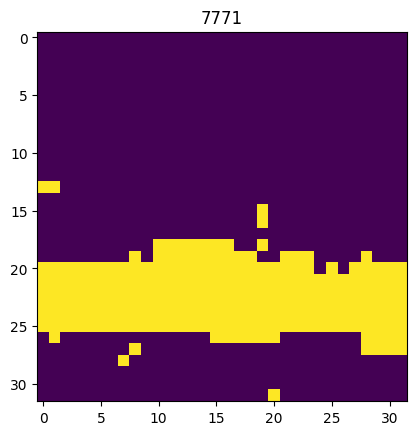

In [81]:
##########################################
##  original demo for 128x128x1         ##
##########################################
random_seed = 7771
n_real = 1
real_nx, real_ny, real_nz = 32, 32, 1
template_size = [5, 5, 1]

real = multi_points_modeling(TI, template_size, random_seed, real_nx, real_ny, real_nz,soft_data=soft_data)
plt.imshow(real)
plt.title(f'{random_seed}')